## Installing the necessary packages

In [ ]:
!pip install diplib
!pip install numpy

## Make a path to your files
Make sure you have a folder on your computer named "IAAM_Images" and that you have the images saved inside that folder.
after ```home_dir``` you put the location of the folder in which you put your IAAM_Images. 

In [ ]:
%matplotlib inline
import diplib as dip
import numpy as np
import os
import matplotlib.pyplot as plt
# Define the path to the home_dir folder on the C or D drive ()
home_dir = ".\\"  # Use double backslashes to escape the backslash

# Construct the full path to the folder "IAAM Images" within the home_dir folder
iaam_images_path = os.path.join(home_dir, "IAAM_Images")


print ( iaam_images_path)
# Check if the code can find the file (check the file)
if os.path.exists(home_dir):
    print("The path exists and can be found.")
else:
    print("The path does not exist or cannot be found.")


## Read the image

In [ ]:
# Specify the file name (for other images put other filenames here.)
file_name = "rect4c.tif"
A = dip.ImageReadTIFF(os.path.join(iaam_images_path, file_name))

## Show the image 
A pop-up window will open

In [ ]:
dip.viewer.Show(A)

In [ ]:
def plot_histogram(file_name):
    A = dip.ImageReadTIFF(os.path.join(iaam_images_path, file_name))
    hist= dip.Histogram(A)
    hist.Show()



In [ ]:
file_names = ["rect1a.tif", "rect2a.tif", "rect3a.tif", "rect4a.tif"]

for file_name in file_names:
    plot_histogram(file_name)
    

In [ ]:
file_name = "rect2a.tif"
A = dip.ImageReadTIFF(os.path.join(iaam_images_path, file_name))

In [ ]:
threshold = dip.IsodataThreshold(A)
binary_image = A < 70
print(threshold)

In [ ]:
labeled_image = dip.Label(binary_image, connectivity=1)


In [ ]:
labeled_image.Show()
# dip.viewer.Show(labeled_image)

In [ ]:
measurements = dip.MeasurementTool.Measure(labeled_image, A, ['Size'])
sizes = np.array([measurements['Size'][obj] for obj in measurements.Objects()])
for i in sizes:
    print (i)

In [ ]:
sizes

## 2.1.2

In [ ]:
def compute_size(file_name):
    A = dip.ImageReadTIFF(os.path.join(iaam_images_path, file_name))
    binary_image = A < 70
    labeled_image = dip.Label(binary_image, connectivity=1)
    measurements = dip.MeasurementTool.Measure(labeled_image, A, ['Size'])
    sizes = np.array([measurements['Size'][obj] for obj in measurements.Objects()])
    return sizes
    

In [ ]:
all_sizes = []

for file_name in file_names:
    sizes = compute_size(file_name)
    all_sizes.extend(sizes)
all_sizes_arr = np.array(all_sizes)

In [ ]:
print(np.mean(all_sizes_arr))
print(np.std(all_sizes_arr))

## 2.1.3

In [ ]:
def compute_perimeter(file_name):
    A = dip.ImageReadTIFF(os.path.join(iaam_images_path, file_name))
    binary_image = A < 70
    labeled_image = dip.Label(binary_image, connectivity=1)
    measurements = dip.MeasurementTool.Measure(labeled_image, A, ['Perimeter'])
    sizes = np.array([measurements['Perimeter'][obj] for obj in measurements.Objects()])
    return sizes

In [ ]:
all_perims = []

for file_name in file_names:
    sizes_p = compute_perimeter(file_name)
    all_perims.extend(sizes_p)
all_perims_arr = np.array(all_perims)

In [ ]:
all_perims_arr

In [ ]:
print(np.mean(all_perims_arr))
print(np.std(all_perims_arr))


## 2.2.4

In [ ]:

def compute_cv_and_mean(file_names):
    results = []

    for file_name in file_names:
        sizes = compute_size(file_name)
        if len(sizes) > 0:
            mean_size = np.mean(sizes)
            # print(mean_size)
            std_dev = np.std(sizes)
            cv = std_dev / mean_size
            
            results.append((np.sqrt(mean_size), cv))
    
    return np.array(results)

def plot_cv_vs_mean(results, title):
    plt.figure()
    plt.plot(results[:, 0], results[:, 1], 'o')
    plt.xlabel('Sqrt of the mean size')
    plt.ylabel('CV')
    plt.title(f'relative discretization error for {title}')
    plt.grid(True)
    plt.show()

results = compute_cv_and_mean(file_names)
plot_cv_vs_mean(results, title="area")
results

## 2.2.5

In [ ]:
def compute_cv_and_mean_perimeter(file_names):
    results = []

    for file_name in file_names:
        perimeters = compute_perimeter(file_name)
        if len(perimeters) > 0:
            mean_perimeter = np.mean(perimeters)
            std_dev = np.std(perimeters)
            cv = std_dev / mean_perimeter

            results.append((np.sqrt(mean_perimeter), cv))

    return np.array(results)

results_perimeter = compute_cv_and_mean_perimeter(file_names)
plot_cv_vs_mean(results_perimeter, title="perimeter")

Differences:
RDE is an indication of how accurate the measure is, compared to its actual size. If a rectangle is smaller, its more difficult to be very accurate.
So as perimeter is only the outside of the object, a single inaccuracy can have a bigger impact than the entire size. This is why the RDE gets lower more slowly than for size.

## 2.3.7

In [ ]:
file_names_b = ["rect1b.tif", "rect2b.tif", "rect3b.tif", "rect4b.tif"]
file_names_c = ["rect1c.tif", "rect2c.tif", "rect3c.tif", "rect4c.tif"]

for i in file_names_b:
    plot_histogram(i)
for i in file_names_c:
    plot_histogram(i)

## 2.3.8 & 2.3.9

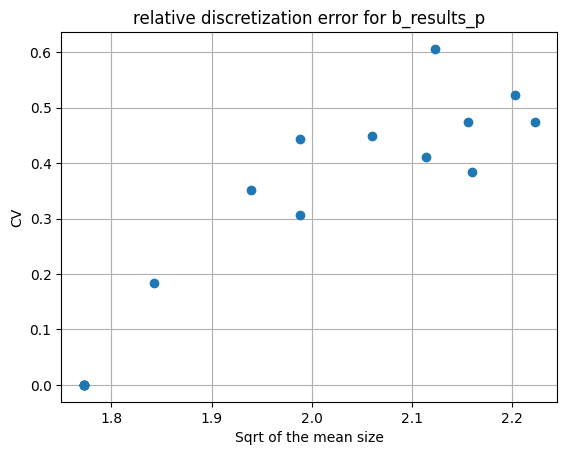

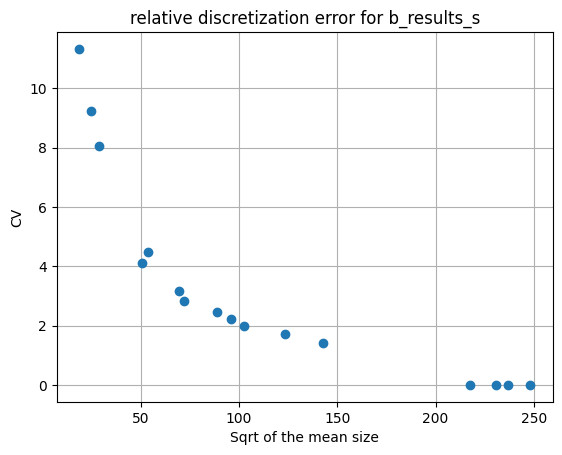

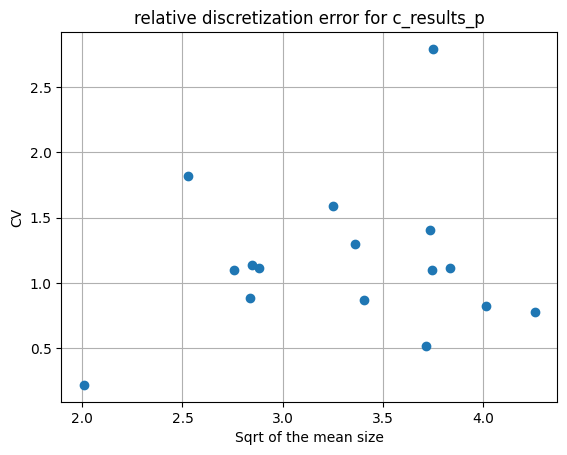

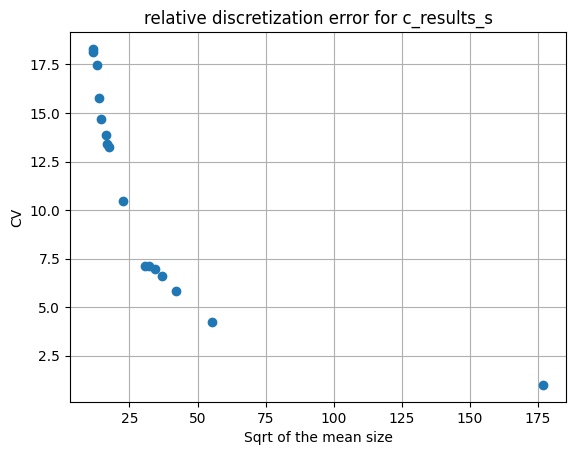

In [104]:
def apply_gaussian_filter(image, sigma):
    return dip.Gauss(image, sigma)

def apply_median_filter(image, kernel_size):
    return dip.MedianFilter(image, [kernel_size, kernel_size])

def compute_size(binary_image):
    labeled_image = dip.Label(binary_image, connectivity=1)
    measurements = dip.MeasurementTool.Measure(labeled_image, A, ['Size'])
    sizes = np.array([measurements['Size'][obj] for obj in measurements.Objects()])
    return sizes
    

def compute_perimeter(binary_image):
    labeled_image = dip.Label(binary_image, connectivity=1)
    measurements = dip.MeasurementTool.Measure(labeled_image, A, ['Perimeter'])
    sizes = np.array([measurements['Perimeter'][obj] for obj in measurements.Objects()])
    return sizes

def analyze_series_with_filters(file_names, filter_functions, filter_params):
    results_p = []
    results_s = []

    for file_name in file_names:
        A = dip.ImageReadTIFF(os.path.join(iaam_images_path, file_name))

        for filter_name, (filter_func, params) in filter_functions.items():
            for param in params:
                filtered_image = filter_func(A, param)
                threshold = dip.IsodataThreshold(filtered_image)
                binary_image = filtered_image > 110
                # binary_image.Show()
                print("Filter: ", filter_name, " with paramater: ",  param, " file: ", file_name)
                filtered_image.Show()
                # hist = dip.Histogram(filtered_image)
                # hist.Show()
                perimeter = compute_perimeter(binary_image)
                size = compute_size(binary_image)
                # print(perimeter)
                # print(size)

                if len(perimeter) > 0:
                    mean_perimeter = np.mean(perimeter)
                    std_dev = np.std(perimeter)
                    cv = std_dev / mean_perimeter

                    results_p.append((np.sqrt(mean_perimeter), cv))

                if len(size) > 0:
                    mean_size = np.mean(size)
                    std_dev = np.std(size)
                    cv = std_dev / mean_size

                    results_s.append((np.sqrt(mean_size), cv))


    return np.array(results_s),np.array(results_p)

filters = {
    "Gaussian": (apply_gaussian_filter, [1.0, 2.0]),
    "Median": (apply_median_filter, [3, 5])
}

b_results_s, b_results_p = analyze_series_with_filters(file_names_b, filters, None)
plot_cv_vs_mean(b_results_p, title="b_results_p")
plot_cv_vs_mean(b_results_s, title="b_results_s")

c_results_s, c_results_p = analyze_series_with_filters(file_names_c, filters, None)
plot_cv_vs_mean(c_results_p, title="c_results_p")
plot_cv_vs_mean(c_results_s, title="c_results_s")



In [ ]:
results = compute_cv_and_mean(file_names_b)
plot_cv_vs_mean(results, title="area")

In [ ]:
results_perimeter = compute_cv_and_mean_perimeter(file_names_b)
plot_cv_vs_mean(results_perimeter, title="perimeter")